In [10]:
import os
import pandas as pd
import matplotlib.pyplot as plt

def append(df, data):
    df.loc[len(df.index)] = data
    
def run_tshark(filename, name, df):
    data = [name]
    write_files = ["output/txt/total_packets.txt", \
                   "output/txt/successful_attempts.txt", \
                   "output/txt/unsuccessful_attempts.txt", \
                   "output/txt/describe_packets.txt", \
                    "output/txt/unique_describe_packets.txt"]
    
    for x in write_files:
        os.system("rm -f" + x)
    os.system("rm -f" + "output/txt/times.txt")
    
    cmd = "tshark -r " + filename + " | wc -l > output/txt/total_packets.txt"
    print(cmd)
    os.system(cmd)

    tshark_filter_200 = '"rtsp.response contains "200""'
    cmd = "tshark -r " + filename + " -Y " + tshark_filter_200 + " | wc -l > output/txt/successful_attempts.txt"
    print(cmd)
    os.system(cmd)

    tshark_filter_unsuccessful = '"rtsp.response contains "401""'
    cmd = "tshark -r " + filename + " -Y " + tshark_filter_unsuccessful + " | wc -l > output/txt/unsuccessful_attempts.txt"
    print(cmd)
    os.system(cmd)
    
    tshark_filter_unsuccessful = '"rtsp.request"'
    cmd = "tshark -r " + filename + " -Y " + tshark_filter_unsuccessful + " | wc -l > output/txt/describe_packets.txt"
    print(cmd)
    os.system(cmd)
    
    cmd = 'tshark -r ' + filename +  ' -Y rtsp.request | grep -oP "DESCRIBE\K.*" | cut -d " " -f 2 | uniq | wc -l > output/txt/unique_describe_packets.txt'
    print(cmd)
    os.system(cmd)
    
    cmd = 'tshark -r ' + filename + " -Y rtsp.request | awk '{$1=$1};1' | cut -d \" \" -f 2 > output/txt/times.txt"
    os.system(cmd)
    
    average_time_between_attempts = get_times()
    
    for x in write_files:
        with open(x, "r") as f:
            for line in f:
                data.append(int(line))
    total_attempts = data[2] + data[3]
    data.append(total_attempts) 
    

    data.append(average_time_between_attempts)
    
    print(data)
    append(df, data)
    
    

        
    return write_files

def get_times():
    times = [0]
    print(times)
    with open("output/txt/times.txt") as f:
        for time in f:
            times.append(float(time.strip()))
            
            
    print(times)
    between = []
    index = 0
    
    for x in range(len(times)-1):
        between_time = times[index+1] - times[index]
        between.append(between_time)
        index += 1     
    
    average_time_between_attempts = round(sum(between) / len(between), 4)
    return average_time_between_attempts


def graph_time(df):
    df.plot(x='Filename', y='Average Time Between Attempts', kind="bar", figsize=(5,5))
    plt.show()
                    
    


In [11]:
df = pd.DataFrame(columns = ['Filename', 'Total Packets', 'Successful Attemps','Unsuccessful Attempts', 'Describe Packets', 'Unique Describe Packets', 'Total Attempts', 'Average Time Between Attempts'])
filenames = []

cwd = os.getcwd() + "/data/"
cwd = "data/"
for root, dirs, files in os.walk(cwd, topdown=True):
    for x in files:
        filenames.append(x)
        if ".pcap" in x:
            filename = '"' + root + "/" + x + '"'
            filename = filename.replace('\\','/')
            print(filename)
            run_tshark(filename, x, df)

df    


"data/hydra/Amcrest Camera/Amcrest_hydra_1.pcap"
tshark -r "data/hydra/Amcrest Camera/Amcrest_hydra_1.pcap" | wc -l > output/txt/total_packets.txt
tshark -r "data/hydra/Amcrest Camera/Amcrest_hydra_1.pcap" -Y "rtsp.response contains "200"" | wc -l > output/txt/successful_attempts.txt
tshark -r "data/hydra/Amcrest Camera/Amcrest_hydra_1.pcap" -Y "rtsp.response contains "401"" | wc -l > output/txt/unsuccessful_attempts.txt
tshark -r "data/hydra/Amcrest Camera/Amcrest_hydra_1.pcap" -Y "rtsp.request" | wc -l > output/txt/describe_packets.txt
tshark -r "data/hydra/Amcrest Camera/Amcrest_hydra_1.pcap" -Y rtsp.request | grep -oP "DESCRIBE\K.*" | cut -d " " -f 2 | uniq | wc -l > output/txt/unique_describe_packets.txt
[0]
[0, 0.004956, 0.005109, 0.005109, 0.005128, 0.006207, 0.00627, 0.137026, 0.169696, 0.169779, 0.196526, 0.196871, 0.207876, 0.259925, 0.325245, 0.325246, 0.336291, 0.336316, 0.336317, 32.276806, 32.36416, 32.364161, 32.364172, 32.364348, 32.36453, 32.409747, 32.522448, 32.52665

Filename  Total Packets  Successful Attemps  \
0     Amcrest_hydra_1.pcap          19567                   5   
1     Amcrest_hydra_2.pcap          19567                   5   
2     Amcrest_hydra_3.pcap          19567                   5   
3      Simcam_hydra_1.pcap          19567                   5   
4      Simcam_hydra_2.pcap          19567                   5   
5      Simcam_hydra_3.pcap          19567                   5   
6   AmcrestCam_nmap_1.pcap          19567                   5   
7   AmcrestCam_nmap_2.pcap          19567                   5   
8   AmcrestCam_nmap_3.pcap          19567                   5   
9       Simcam_nmap_1.pcap          19567                   5   
10      Simcam_nmap_2.pcap          19567                   5   

    Unsuccessful Attempts  Describe Packets  Unique Describe Packets  \
0                     178               183                      178   
1                     178               183                      178   
2                     178               183                      178   
3                     178               183                      178   
4                     178               183                      178   
5                     178               183                      178   
6                     178               183                      178   
7                     178               183                      178   
8                     178               183                      178   
9                     178               183                      178   
10                    178               183                      178   

    Total Attempts  Average Time Between Attempts  
0              183                         1.5001  
1              183                         1.5001  
2              183                         1.5001  
3              183                         1.5001  
4              183                         1.5001  
5              183                         1.5001  
6              183                         1.5001  
7              183                         1.5001  
8              183                         1.5001  
9              183                         1.5001  
10             183                         1.5001

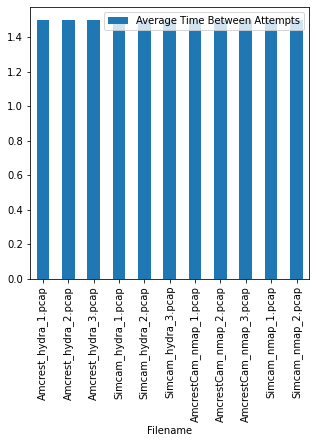

In [12]:
graph_time(df)
